<a href="https://colab.research.google.com/github/danquio194/github-slideshow/blob/master/Entregable1_ML_Daniel_Quinones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

**Exercise 1.2** Suppose we use perceptron to detect spam messages. Let's say that each email message is represented by the frecuency of occurrence of keywords, and the output is +1 if the message is considered spam.

**(a)** Can you think of some keywords that will end up with a large positive weight in the perceptron?

**Solution:** The keywords that end up in a large positive weight in this perceptron, could be words that historicaly had been used in spam emails. Based on [1] we choose some of them that are strongly classified as spam: 
"Not Spam", "Spam", "Nigerian", "No cash", "Free 100%", "Life insurance", "Loan", "Extra", "Miracle", "Make money", "Viagra", "Meet singles", "Sex", "Hot girls", etc...

**(b)** How about keywords that will get a negative weight?
**Solution:** Is harder classify these keywords, without a context. But words preceded by the sign "©", or that contains the words "Official" in the subject, should have a heavyer negative weight; because thus is very likely that an official account or company is sending the email. 

**(c)** What parameter in the perceptron directly affects how many border-line messages end up being classified as spam?
**Solution:** The parameter b is the one that affects how many messages are classified as spam, due to that is the 'edge' that the values has to pass to get a positive output, or in case they be under b value, get a negative output. 

**References:**
[1] 2020. 202 email spam trigger words that will get you in trouble in 2020. Margo, L. Taken from: https://www.autopilothq.com/blog/email-spam-trigger-words/


**Exercise 1.3** The weight update rule in (1.3) has the nice interpretation that it moves in the direction of classifying $x(t)$ correctly.

(a) Show that $y(t) w^{T}(t) x(t) < 0$. [Hint: x(t) is misclassified by w(t)]

**Solution:** If $y(t)$ missclassified x(t), then the example $(x(t), y(t)$ is missclassified thus $sign(y(t)) \neq sign(w^{T}(t) x(t))$. Therefore $y(t) w^{T}(t) x(t) < 0$.

(b) Show that $y(t) w^{T}(t + 1) x(t) > y(t) w^{T}(t) x(t)$ [Hint: Use (1.3).]

**Solution:** Applying $(1.3)$ formula


\begin{equation}
y(t) w^{T}(t + 1) x(t) = y(t)[w^{T}(t) + y(t)x^{T}(t)]x(t) \\
                       = y(t)w^{T}(t)x(t) + y^{2}(t)x^{T}(t)x(t)
\end{equation}

As $y^{2}(t)x^{T}(t)x(t) > 0$ we get

\begin{equation}
y(t) w^{T}(t + 1) x(t) > y(t) w^{T}(t) x(t)
\end{equation}

That is what we want to demostrate.
(c) As far as classifying $x(t)$ is concerned, argue that the move from $w(t)$ to $w(t+1)$ is a move 'in the right direction'.

**Solution:** We can see from $(b)$ that $y(t) w^{T}(t + 1) x(t) > y(t) w^{T}(t) x(t)$, meaning that the weights in $w(t)$ are adjusted in a way that the example $(x(t), y(t)$ is classified correctly. For this reason we can say that the classification is improved, and as we have finite examples, we can apply this arrangement to eache of them, to finally hace the ideal classification of all of them.




**Exercise 1.10** Here is an experiment that illustrates the difference between a single bin and multiple bins. Run a computer simulation for flipping 1000 fair coins. Flip each coin independently 10 times. Let's focus on 3 coins as follows: $c_{1}$ is the first coin flipped; $c_{rand}$ is a coin you choose at random; $c_{min}$ is the coin that had minimum frequency of heads (pick the earlier one in case of tie). Let $v_{1}, v_{rand}$, and $v_{min}$ be the fraction of heads you obtain for the respective three coins:

(a) What is $\mu$ for the three coins selected?

**Solution:** $\mu$ for all the coins is equal to 0.5, because all the coins are fairs and have the same probability to each head.

(b) Repeat the entire experiment a large number of times (e.g. 1000000 runs of the entire experiment) to get several instances of $v_{1}, v_{rand}$, and $v_{min}$ and plot the histograms of the distributions of $v_{1}, v_{rand}$, and $v_{min}$. Notice that which coins end up being $c_{rand}$ and $c_{min}$ may differ from one run to another.

**Solution:** See the code below.

(c) Using (b), plot estimates for $\mathbb{P}[|v - \mu| > \epsilon]$ as a function of $\epsilon$, together with the Hoeffding bound $2e^{-2 \epsilon^{2} N}$ (on the same graph).

(d) Which coins obey the Hoeffding bound , and which ones do not? Explain why.

(e) Relate part (d) to the multiple bins in figure 1.10



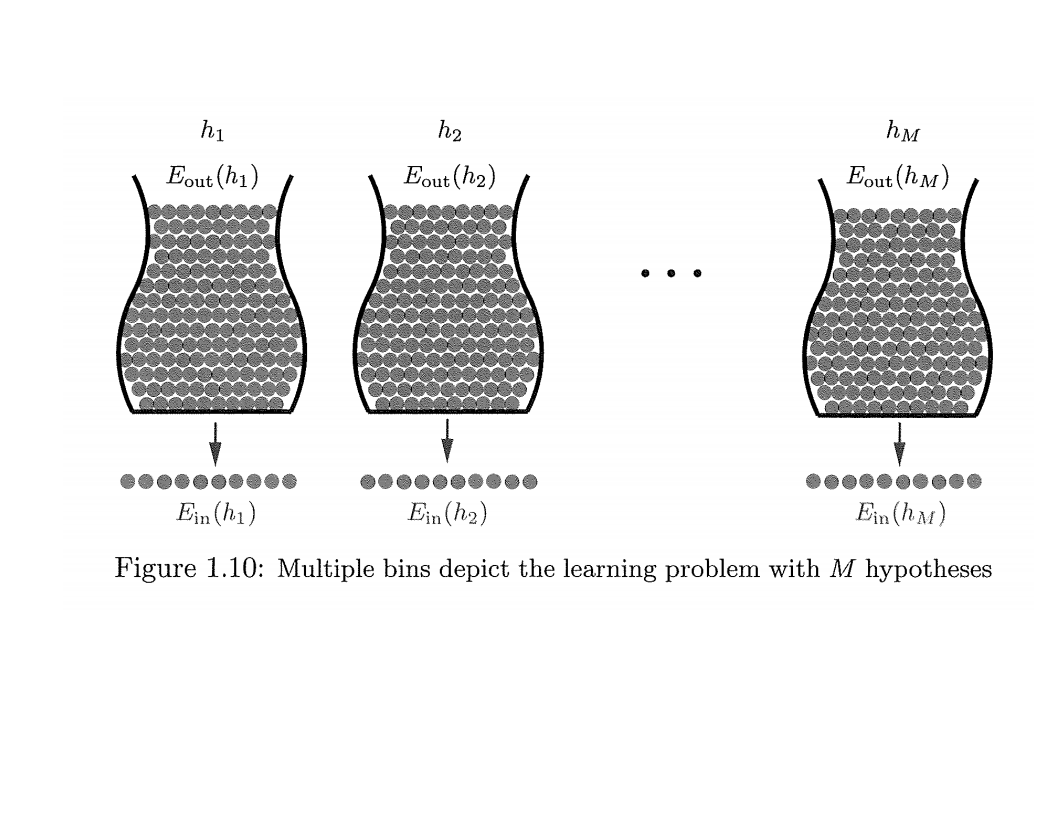

Lets simulate the experiment.

In [5]:
#We define a function that simulate the experiment with the given conditions.
#To get c1, crand and cmin
random.seed(1)


def flip_coin(n_coins):
  simulations = []
  rand_int = random.randint(0, n_coins-1)
  for i in range(n_coins):
    # Toss a fair coin 10 times
    sampleBin = np.random.binomial(1,0.5,10)
    simulations.append(sampleBin)  #Create a list with all the coin's results
    if (i == 0):                   #With this conditional we get the minimum head frecuency coin
      min_heads = simulations[0]
    if (i > 0):
      s = sum(simulations[i])
      if (s < sum(min_heads)):
        min_heads = simulations[i]
  c1 = simulations[0]             #Define c1
  crand = simulations[rand_int]   #Define crand
  cmin = min_heads                #Defin cmin
  return c1, crand , cmin

exp = flip_coin(1000)

v1 = sum(exp[0])       #Define v1
vrand = sum(exp[1])    #Define vrand
vmin = sum(exp[2])     #Define vmin



Now we going to make the plot of the histograms for each variable v1, vrand, vmin, respectively; for a simulation of the whole experiment replicated a 1000000 times

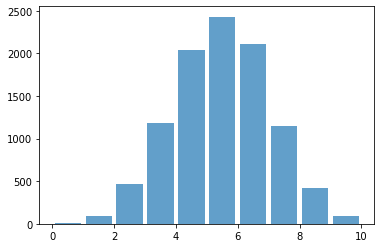

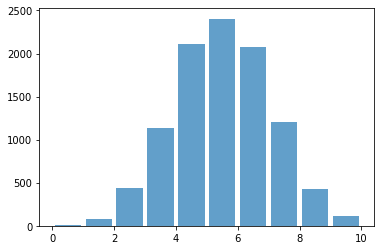

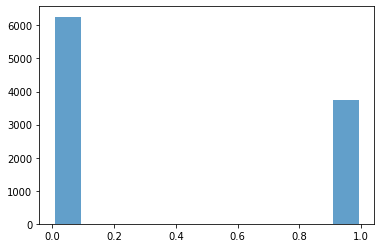

In [6]:
v1_freq = []
vrand_freq = []
vmin_freq = []

for n in range(10000):
  exp = flip_coin(1000)
  v1_freq.append(sum(exp[0]))
  vrand_freq.append(sum(exp[1]))
  vmin_freq.append(sum(exp[2]))



plt.figure(1)
#plt.subplot(311)
plt.hist(v1_freq, bins = 10, alpha=0.7, rwidth=0.85)

plt.figure(2)
#plt.subplot(312)
plt.hist(vrand_freq, bins = 10, alpha=0.7, rwidth=0.85)

plt.figure(3)
#plt.subplot(313)
plt.hist(vmin_freq, bins = 10, alpha=0.7, rwidth=0.85)
plt.show()

**Solution part c:**


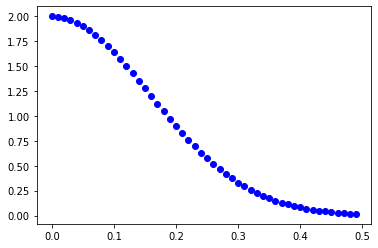

In [11]:
def hoeffding(epsilon, n_flips):
    return 2.0*np.exp(-2.0*n_flips*epsilon**2)

eps = np.arange(0.0,0.5,0.01)

p1 = np.array(sum(v1_freq)/ - 0.5
vrand_freq = []
vmin_freq = []


plt.figure()
plt.plot(eps, hoeffding(eps, 10), 'bo')
plt.show()

**Exercise 2.11** We are given a data set $D$ of 25 training examples from an unkown target function $f: X \longrightarrow Y$, where $X \rightarrow \mathbb{R}$ and $Y = \{-1, +1 \}$. To learn $f$, we use a simple hypothesis set $H = \{h_{1}, h_{2}\}$ where $h_{1}$ is the constant $+1$ function and $h_{2}$ is the constant $-1$.

We consider two learning algorithms, $S$ and $C$. $S$ chooses the hypothesis that agree the most with $D$ and $C$ chooses the hypothesis deliberately. Let us see how these algorithms perform out the sample from the deterministic and probabilistic point of view. Assume in the probabilistic view that there is a probability distribution on $X$, and let $\mathbb{P}[f(x) = +1] = p$.

(a) Can $S$ produce a hypothesis that is *guaranteed* to perform better than random on any point outside $D$?
**Solution:** If is the case that $y_{n} = +1$ for all $n \in D$, $S$ will choose $h_{1}$, but outside the set $D$, could be $y(X) = -1$,  that random algorithm could choose, having a better perform than $D$.


(b) Assume for the rest of the exercise that all the examples in $D$ have $y_{n} = +1$. Is it possible that the hypothesis that $C$ produces turns out to be better than the hypothesis that $S$ produces?
Yes.
 In these case $S$ chooses $h_{1}$ always. However, could be case as the in last exercise that the points out of $D$ are $-1$, and random algorithm $C$, could choose $h_{2}$ with certain probability, resulting better than the hypothesis choosen by $S$.

(c) If $p = 0.9$, what is the probability that $S$ will produce a better hypothesis than $C$?

**Solution:** If $S$ produces a better hypothesis than $C$, then 

\begin{equation}
P[E_{out}(S(D)) < E_{out}(C(D))] = P[E_{out}(h_{1}) < E_{out}(h_{2})] \\
                                 =P[P[f(x) \neq h_{1}] < P[P[f(x) \neq h_{2}]] \\
                                 = P[P[f(x) = -1] < P[f(x) = +1]] \\
                                 = P[0.1 < 0.9] = 1
\end{equation}

That means that the event in which $S$ has less error than $C$ is a certain. 

(d) Is there any value of $p$ for which it is more likely than not that $C$ will produce a better hipothesis than $S$?
Let be $\delta > 0$ a given value. With an analogous reasoning from part (c) we get that if 
$p = 0.5 - \delta$, then 

\begin{equation}
P[E_{out}(C(D)) < E_{out}(S(D))] = P[E_{out}(h_{2}) < E_{out}(h_{1})] \\
                                 =P[P[f(x) \neq h_{2}] < P[P[f(x) \neq h_{1}]] \\
                                 = P[P[f(x) = +1] < P[f(x) = -1]] \\
                                 = P[0.5 - \delta < 1 - (0.5 - \delta)] \\
                                 = P[0.5 - \delta < 1 + \delta) - 0.5] = 1
\end{equation}


**Exercise** Simulate the XOR logical gate with neurons.

**Solution:** 

As we seen the model works based on the model $x_{1} + x_{2} \geq b \rightarrow 1$ and $x_{1} + x_{2} < b \rightarrow 0$, where $x_{1}, x_{e} \in \{0, 1\}$. That means each time that the input overpass $b$, the output will be {1}, and {0} in other case. Adicionally, we can differentiate two types of neurons: inhibitory neurons, that works as a negation in logic. That is if we have an input of 1, the inhibitory neuron changes it for a 0, and vice versa; and the excitatory neurons, that keep the same input they receive.

Also let me remember what is the XOR logical gate with the next table:


 A | B | Out
 --|---|---
 0 | 0 | 0
 0 | 1 | 1
 1 | 0 | 1
 1 | 1 | 0


Knowing that, the following picture shows the simulation of the XOR gate with two neurons A and B, where the red neurons are inhibitory neurons and the white ones are excitatory. In such way we get as result the same output of the table.


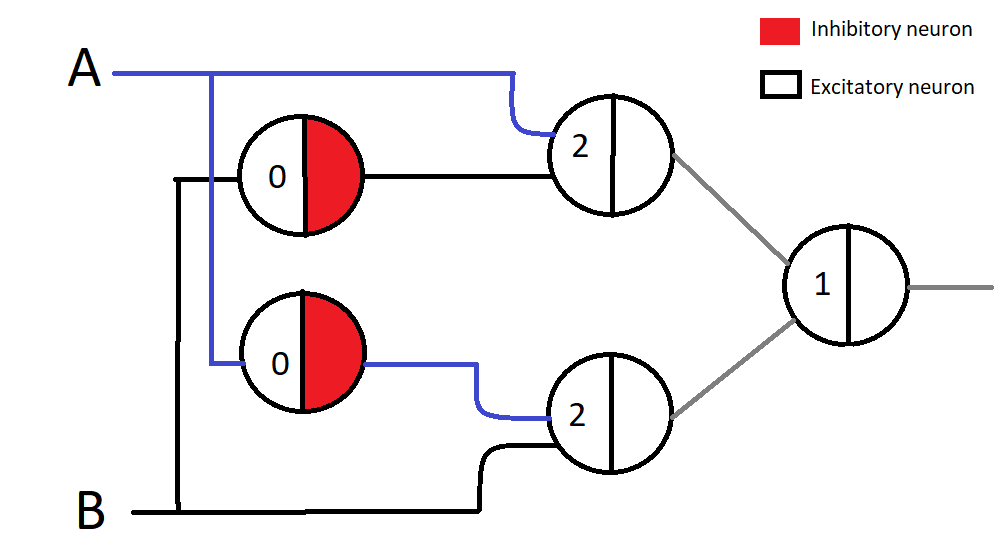

**Exercise** What is the relation of $\frac{|| \theta ^{*}||}{\gamma}$ and the complexity of the classification problem?

**Solution:** Let us suppose the existence of $\theta ^{*}$, that is the ideal classificator for a data set. We know that after k iterations 

\begin{equation}
cos(\theta ^{*}, \theta ^{k}) \geq \frac{\sqrt{k} \gamma}{R ||\theta^{*}||} (1)
\end{equation}

where $\theta^{k}$ is the classificator in the kth iteration, $\gamma$ is the minimum step between iterations and$R$ is the maximum norm or the ball ratio that bound the data. That means that those values are in the interval $[-1, 1]$.

Notice that k takes different values 0, 1, ..., and the rest of the terms are constant. Lets see particularly the implications of $||\theta ^{*}||$ and $\gamma$ to take different values.

If $\gamma >> ||\theta ^{*}||$ then $\frac{|| \theta ^{*}||}{\gamma} < 1$ and the inequality $(1)$ will have a fast convergence to the ideal $\theta^{*}$. We remark that $\gamma$ is the value between steps. So, when we have a huge value for $\gamma$, is more likely hava less iterations until get the limit.

In the other hand if $||\theta ^{*}|| >> \gamma$ then $\frac{|| \theta ^{*}||}{\gamma} > 1$  and $(1)$ will advance slower to the convergence. Therefore the ideal for the value of $||\theta ^{*}||$ is a small value. Similarly we can see that a big R would be troublesome to a fast convergence of the algorithm.

The previous observations let us conclude that a good value for the ratio $\frac{|| \theta ^{*}||}{\gamma}$ is when it is close to $0$. In such way, the convergence of the algorithm is faster, the space among the data is easyer to explore the elements because it have a small bound to reach. When happense the opposite, the difficulty for the algorithm to reach the limit, is greater. Meaning that we will need more steps to have the ideal value $\theta^{*}$.